In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib
import mlem

In [2]:
# Leggo il dataframe e verifico i dati
csv_url = 'resources/Startup.csv'

try:
    df = pd.read_csv(csv_url)
    df.info()
except: 
    print('Qualcosa non ha funzionato ricontrolla')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [3]:
# pulire dati 
'''
# trovare i tipi di dato non congruenti e sistemare
# eliminare valori NaN

...
..
.

'''

name_target_col: str = 'Profit'
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# Feature
X = df.drop(columns=[name_target_col])

# Target 
y = df[name_target_col]

num_entries = y.size
print(f'Target:\n{y}; \nFeature: \n{X}; \nRighe: {num_entries}')


Target:
0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64; 
Feature: 
    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441

In [8]:
# Suddivido il modello per poterlo poi testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Creo il file pickle e lo importo per controllare che funzioni correttamente
joblib.dump(model, 'profit.pkl')

modello = joblib.load('profit.pkl')

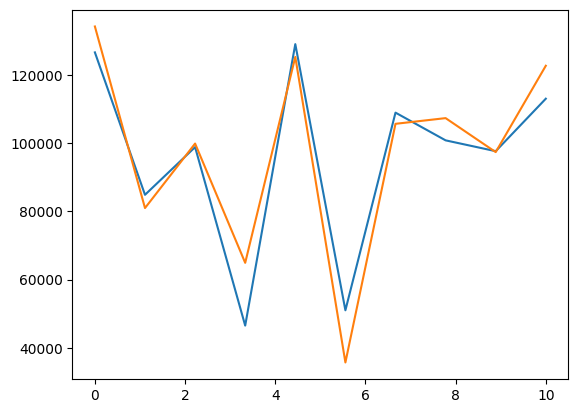

In [11]:
# Test modello 

pred = modello.predict(X_test)

# Verifica visuale con grafico
x = np.linspace(0, pred.size, pred.size)
plt.plot(x, pred)
plt.plot(x, y_test)


In [12]:
# Verifica con indicatori statistici 
trust = round(r2_score(y_test, pred) * 100)
if trust < 20:
    print('modello con bassa accuratezza, piuttosto butta na moneta')
else:
    print(f'il modello ha una accuratezza del {trust}%')

il modello ha una accuratezza del 90%
